# Imbalance classfication problem

The jupyter notebook includes all related algorithms and results for loading dataset, visualizing principal conponents, and, predicting the data's label using Logistic regression and a designed neural network. The problem will be examined several mehtods and ways.


## Introduction

Imbalanced classfication problem (Rare event prediction, Extreme event prediction, Severe class imbalance) refers to a class distribution that is inherently not balanced. As we will see, the classes distribution are not balanced.
 
There are perhaps two main groups of causes for the imbalance we may want to consider; they are data sampling and properties of the domain. Errors may have been made when collecting the observations. One type of error might have been applying the wrong class labels to many examples. Alternately, the processes or systems from which examples were collected may have been damaged or impaired to cause the imbalance.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


NUM_PCA_COMPONENT: int = 2
PCA_VARIANCE: np.float = 0.99
NUM_LDA_COMPONENT: int = 2


def get_data() -> List[pd.DataFrame]:
    input_train_data = pd.read_csv('train_x.csv')
    output_train_data = pd.read_csv('train_y.csv')
    input_test_data = pd.read_csv('test_x.csv')
    return input_train_data, output_train_data, input_test_data


def standardize_data(input_train_data: pd.DataFrame, input_test_data: pd.DataFrame) -> List[np.ndarray]:
    in_train = StandardScaler().fit_transform(input_train_data)
    in_test = StandardScaler().fit_transform(input_test_data)
    return in_train, in_test


def project_data(data: pd.DataFrame) -> pd.DataFrame:
    pca = PCA(n_components=NUM_PCA_COMPONENT)
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents,
                                columns = ['principal component 1', 'principal component 2'])
    return principalDf, pca


def visualize_data_pca(final_df: pd.DataFrame) -> plt.plot:
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [1, 0]
    colors = ['g', 'r']
    for target, color in zip(targets,colors):
        indicesToKeep = final_df['target'] == target
        ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'],
                    final_df.loc[indicesToKeep, 'principal component 2'],
                    c = color,
                    s = 50)
    ax.legend(targets)
    ax.grid()


def visualize_data_lda(input_train_data: pd.DataFrame, out_train_data: pd.DataFrame) -> plt.plot:
    y = out_train_data.target
    X = input_train_data
    y.loc[len(out_train_data) + 1] = y.loc[2] + 2
    X.loc[len(input_train_data) + 1] = input_train_data.loc[0] * 10

    lda = LinearDiscriminantAnalysis(n_components=NUM_LDA_COMPONENT)
    # X_r = lda.fit(X, y).transform(X)
    X_lda = lda.fit_transform(X, y)
    colors = ['navy', 'red']
    target_names = ['False', 'True']
    plt.figure()
    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('2 LDA of data')
    plt.xlabel('LDA 1')
    plt.ylabel('LDA 2')
    plt.grid()
    plt.show()
    print("\n")
    print(f"The LDA variance ratios are {lda.explained_variance_ratio_}\n")

# Examining the possibility of exisiting imbalance in the dataset

In this step, the train data and test data will be loaded, then, we should examine the number of data in each classes to evaluate the possibility of existing imbalance between classes. Besides, the histogram of data will be plotted to examine the issue.

### Two types of Imbalance:

**Slight Imbalance**: An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).

**Severe Imbalance**: An imbalanced classification problem where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more).

#### Problem:

The minority class is harder to predict because there are few examples of this class, by definition.

There exists severe imablance!!



<AxesSubplot:title={'center':'Count (target)'}>

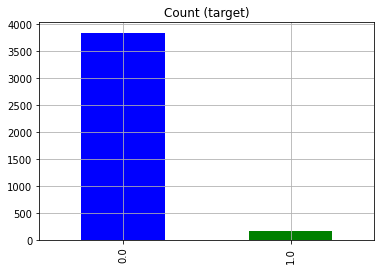

In [2]:
input_train_data, out_train_data, input_test_data = get_data()
data = input_train_data.copy()
data['target'] = out_train_data['target']
classes_ratio = (len(data[data['target'] == 1]) / len(data[data['target'] == 0]))
if classes_ratio <= 0.6:
    print("There exists severe imablance!!\n")
if classes_ratio >= 0.6 and classes_ratio <= 0.95:
    print("There exists slight imbalance!!\n")

data.target.value_counts().plot(kind='bar', title='Count (target)', color = ['b', 'g'], grid=True)

* As the figure above idicates, the frequency of classes is not balanced, and the first class (Target == zero) has much more samples than the other.

In [3]:
data.describe()

,Unnamed: 0,col_prce,col_hour,col_weay,col_esce,col_wing,col_prst,col_haon,col_orid,col_deid,...,col_petd,col_eses,col_weme,col_wede,col_intd,col_prde,col_t_ve,col_ta_le,col_drsnt,target
count,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2991.514250,150647.500000,14.424250,2.0,11763.488750,0.012250,21.790355,0.022000,102.064500,118.221000,...,4.055684,1340.609659,5.453974e+06,122805.815061,31959.203531,1.290484,0.972000,0.987750,3.366750,0.04025
std,1732.096649,80418.421549,4.865612,0.0,11394.640456,0.110013,146.638378,0.146702,158.338023,190.057627,...,4.464663,1713.611346,4.169499e+06,50578.007410,31387.635886,0.901657,0.164993,0.110013,0.794923,0.19657
min,0.000000,40000.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,49.000000,49.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,1482.750000,95000.000000,11.000000,2.0,4544.750000,0.000000,11.287774,0.000000,54.000000,54.000000,...,1.360167,393.885093,2.148372e+06,92043.448930,14184.541729,0.731466,1.000000,1.000000,3.000000,0.00000
50%,2969.500000,135000.000000,15.000000,2.0,8291.500000,0.000000,15.988159,0.000000,61.000000,61.000000,...,2.949046,828.456716,4.651941e+06,118397.548343,25197.919999,1.086246,1.000000,1.000000,4.000000,0.00000
75%,4511.250000,190000.000000,18.000000,2.0,14841.750000,0.000000,22.640443,0.000000,65.000000,67.000000,...,5.472146,1602.032246,7.984906e+06,149599.613095,41310.745142,1.616047,1.000000,1.000000,4.000000,0.00000
max,5999.000000,815000.000000,23.000000,2.0,169578.000000,1.000000,9166.666667,1.000000,870.000000,871.000000,...,120.162104,25564.146128,2.802885e+07,713320.250000,818665.079680,8.695652,1.000000,1.000000,4.000000,1.00000


# Visualize Principal Components

The dataset should be normalized in order to avoid any problem not only in learning phase but also in computing principal components. Eventually, the data will be shown by considering principal components.

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. The algorithm standardize approach is the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms. Moreover, Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data.

Here we plot the different samples on the 2 first principal components.

The pca's variance ratio is [0.18547859 0.0773893 ]



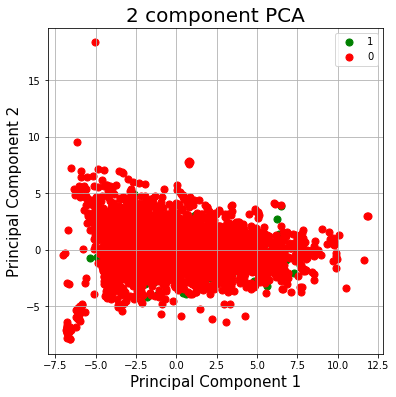

In [4]:
in_train, in_test = standardize_data(input_train_data, input_test_data)
principal_df, pca = project_data(in_train)
final_df = pd.concat([principal_df, out_train_data[['target']]], axis=1)
visualize_data_pca(final_df)
print(f"The pca's variance ratio is {pca.explained_variance_ratio_}\n")

The plot of the dataset is created showing the large mass of examples for the majority class (red) and a small number of examples for the minority class (green), with some class overlap.

# Linear Discriminant Analysis (LDA)

LDA tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

Teh plot of the dataset is created showing the large mass of examples for the majority class (blue) and a small number of examples for the minority class (red), with some class overlap.

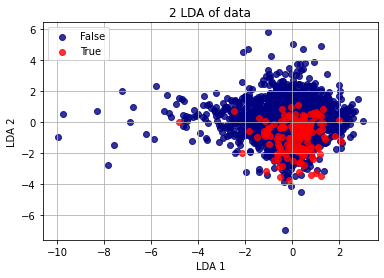



The LDA variance ratios are [0.99853512 0.00146488]



In [5]:
visualize_data_lda(input_train_data, out_train_data)

# Applying PCA to the Data
Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. As defined in the first cell, the pcas' variance is 0.98, so there are forty five principal components for this value. By increasing its value, the number of principal components will increase and vice-versa.

In [6]:
pca = PCA(PCA_VARIANCE)
pca.fit(in_train)
print(f"Num of principal components is {pca.n_components_}\n")
train_ = pca.transform(in_train)
test_ = pca.transform(in_test)

Num of principal components is 45



# Logistic Regression

The fitting problem for train data will be computed by using Logistic Regression in this step. Then, the fitting accuracy will be computed for the seperated test data. Eventually, the target for the test data will be calculated using the obtained parameters in Logistic Regression. Finally, the result is saved as a CSV file.

* accuracy (fraction of correct predictions): correct predictions / total number of data points

In [7]:
train_1, test_1, train_lbl, test_lbl = train_test_split(train_, out_train_data.target, test_size=1/5.0, random_state=0)
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_1, train_lbl)

print(f"The prediction score on test:    {str(logisticRegr.score(test_1, test_lbl))}\n")
print(f"The prediction score on train:   {str(logisticRegr.score(train_1, train_lbl))}\n")

test_predictions = logisticRegr.predict(test_)
test_y = pd.DataFrame(test_predictions, columns=['target'])
test_y['Unnamed: 0'] = out_train_data['Unnamed: 0']
test_y = test_y[['Unnamed: 0', 'target']]
test_y.head(8) 

The prediction score on test:    0.94875

The prediction score on train:   0.9621875



,Unnamed: 0,target
0,3915,0.0
1,4339,0.0
2,3422,0.0
3,5624,0.0
4,886,0.0
5,5936,0.0
6,3179,0.0
7,3969,0.0


## NOTES on Logisitic Regression:

1) The difference betweeen train score and test score is not significant, then, there does not exist any overfitting in the logistic regression fitting.

2) As the results of prediction clarify, all of the predicted targets are zero, which indicate that the logistic regression is not able to solve the imbalance classification problem, and causes the following problems: 

* The abundance of samples from the majority class can swamp the minority class. Most machine learning algorithms for classification predictive models are designed and demonstrated on problems that assume an equal distribution of classes. This means that a naive application of a model may focus on learning the characteristics of the abundant observations only, neglecting the examples from the minority class that is, in fact, of more interest and whose predictions are more valuable.

* The learning process of most classification algorithms is often biased toward the majority class examples, so that minority ones are not well modeled into the final system.

Hence, we are going to use deep learning methods to solve the problem.

# Neural Network (Deep Learning)

Deep learning uses an artificial neural network that uses multiple layers to progressively extract higher level features from the training data.


# Regularisation

In the following, I applied the 3 best practices for handling overfitting in a neural network:

**1) reduce the network’s size**

**2) adding some weight regularisation**

**3) adding dropout**


## Metrics

There are many metrics for evaluating how good a binary classifier is doing in predicting the class labels for instances/examples. Below are some caveats and suggestions for choosing and interpreting the appropriate metrics.

* Accuracy can be misleading. Since accuracy is simple the ratio of correctly predicted instances over all instances used for evaluation, it is possible to get a decent accuracy while having mostly incorrect predictions for the minority class.

* Confusion matrix helps break down the predictive performances on different classes.

Therefore, we utilize a combination of confusion matrix metrics, and curves for solving the problem. Beside, we can compute the classes' weight, then use these weights for fitting problem in order to decrease imbalancing.

Split the dataset into train, validation, and test sets. The validation set is used during the model fitting to evaluate the loss and any metrics, however the model is not fit with this data. The test set is completely unused during the training phase and is only used at the end to evaluate how well the model generalizes to new data. This is especially important with imbalanced datasets where overfitting is a significant concern from the lack of training data.

In [8]:
from keras import layers, models, optimizers, losses, metrics, regularizers, callbacks, initializers


NUM_VALIDATION: int = int(len(train_) * 0.2)

train_1, test_1, train_lbl, test_lbl = train_test_split(train_, out_train_data.target, test_size=1/6.0, random_state=0)
x_validation = train_1[:NUM_VALIDATION]
x_partial_train = train_1[NUM_VALIDATION:]
y_validation = train_lbl[:NUM_VALIDATION]
y_partial_train = train_lbl[NUM_VALIDATION:]


weight_for_0 = (1 / len(out_train_data[out_train_data['target'] ==0])) * (len(out_train_data)) / 2.0
weight_for_1 = (1 / len(out_train_data[out_train_data['target'] ==1])) * (len(out_train_data)) / 2.0
class_weights = {0: weight_for_0, 1: weight_for_1}
bias_initializer = initializers.HeNormal()

metrics_ = [
    metrics.FalseNegatives(name="fn"),
    metrics.FalsePositives(name="fp"),
    metrics.TrueNegatives(name="tn"),
    metrics.TruePositives(name="tp"),
    metrics.Precision(name="precision"),
    metrics.Recall(name="recall"),
    metrics.AUC(name='auc'),
    metrics.AUC(name='prc', curve='PR')
]


early_stopping = callbacks.EarlyStopping(monitor='val_prc', 
                                        verbose=1,
                                        patience=10,
                                        mode='max',
                                        restore_best_weights=True)

def dl_model() -> models.Model:
    model = models.Sequential()
    model.add(layers.Dense(128, activation="relu", input_shape=(train_1.shape[-1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid', bias_initializer=bias_initializer))
    model.compile(optimizer=optimizers.Adam(lr=1e-3),
                    loss='binary_crossentropy',
                    metrics=metrics_)
    return model


def regularized_dl_model() -> models.Model:
    model = models.Sequential()
    model.add(layers.Dense(128, activation="relu", input_shape=(train_1.shape[-1],)))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.003), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.003), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid', bias_initializer=bias_initializer))
    model.compile(optimizer=optimizers.Adam(lr=1e-3),
                    loss='binary_crossentropy',
                    metrics=metrics_)
    return model


In [9]:
model = dl_model()
model_dl_history = model.fit(x_partial_train, y_partial_train,
        epochs=1000,
        batch_size=128,
        verbose=2,
        shuffle=True,
        validation_data=(x_validation, y_validation),
        class_weight=class_weights)

print("\n")
model.summary()
print("\n")
print(f"score on test:  {str(model.evaluate(test_1, test_lbl)[1])}\n")
print(f"score on train: {str(model.evaluate(train_1, train_lbl)[1])}\n")

7/1000
20/20 - 0s - loss: 1.3320e-08 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 2437.0000 - tp: 96.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 1.5477 - val_fn: 31.0000 - val_fp: 14.0000 - val_tn: 753.0000 - val_tp: 2.0000 - val_precision: 0.1250 - val_recall: 0.0606 - val_auc: 0.5305 - val_prc: 0.0542
Epoch 948/1000
20/20 - 0s - loss: 1.1390e-08 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 2437.0000 - tp: 96.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 1.5480 - val_fn: 31.0000 - val_fp: 14.0000 - val_tn: 753.0000 - val_tp: 2.0000 - val_precision: 0.1250 - val_recall: 0.0606 - val_auc: 0.5305 - val_prc: 0.0542
Epoch 949/1000
20/20 - 0s - loss: 1.2013e-08 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 2437.0000 - tp: 96.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 1.5491 - val_fn: 31.0000 - val_fp: 14.0000 - val_tn: 753.0000 - val_tp: 2.0000 - val_precision: 0.1250 - val_recall: 0.0606 - val_

In [10]:
model_regularized = regularized_dl_model()
model_regularized.fit(x_partial_train, y_partial_train,
        epochs=1000,
        batch_size=128,
        verbose=2,
        shuffle=True,
        validation_data=(x_validation, y_validation),
        class_weight=class_weights)

print("\n")
model_regularized.summary()
print("\n")
print(f"score on test:  {str(model_regularized.evaluate(test_1, test_lbl)[1])}\n")
print(f"score on train:  {str(model_regularized.evaluate(train_1, train_lbl)[1])}\n")

.1667 - val_recall: 0.0909 - val_auc: 0.5501 - val_prc: 0.0669
Epoch 947/1000
20/20 - 0s - loss: 0.0456 - fn: 1.0000 - fp: 1.0000 - tn: 2436.0000 - tp: 95.0000 - precision: 0.9896 - recall: 0.9896 - auc: 1.0000 - prc: 0.9999 - val_loss: 0.7407 - val_fn: 28.0000 - val_fp: 26.0000 - val_tn: 741.0000 - val_tp: 5.0000 - val_precision: 0.1613 - val_recall: 0.1515 - val_auc: 0.5542 - val_prc: 0.0690
Epoch 948/1000
20/20 - 0s - loss: 0.0468 - fn: 0.0000e+00 - fp: 14.0000 - tn: 2423.0000 - tp: 96.0000 - precision: 0.8727 - recall: 1.0000 - auc: 0.9998 - prc: 0.9893 - val_loss: 0.7142 - val_fn: 30.0000 - val_fp: 14.0000 - val_tn: 753.0000 - val_tp: 3.0000 - val_precision: 0.1765 - val_recall: 0.0909 - val_auc: 0.5492 - val_prc: 0.0637
Epoch 949/1000
20/20 - 0s - loss: 0.0487 - fn: 1.0000 - fp: 6.0000 - tn: 2431.0000 - tp: 95.0000 - precision: 0.9406 - recall: 0.9896 - auc: 0.9999 - prc: 0.9983 - val_loss: 0.7833 - val_fn: 28.0000 - val_fp: 36.0000 - val_tn: 731.0000 - val_tp: 5.0000 - val_preci

## Notes on the result

* The regularized model has much less train/total parameter, So it's architecture has better than the first one.

* According to the results, the referred metrics have approximately same performance for both models.

* Although, the metrics performance are good for the train data, their functionality for the test data are roughly poor. So, we can not trust to the models, and we should apply some appproaches to increase performance.

# Data Manipulation

There exists several ways to balance the number of smaples in each classes. As mentioned before, there exists severe imbalance between the classes. As shown above, most machine learning techniques will ignore the minority class, and thus, perform poorly on the observations we are most interested in. Typical challenges are biased predictions and appropriate selection of score type. There are multiple approaches to address data imbalance and the approaches could primarily focus on random oversampling/undersampling and SMOTE (Synthetic Minority Oversampling Technique) for tabular data. I am going to explain and use SMOTE method for augmenting data.


## Upsampling using SMOTE (Synthetic Minority Over-sampling Technique)
A data augmentation technique for tabular data. SMOTE creates new data points based on the existing minority class data points using linear combinations of feature vectors. 

In the folllowing steps, the dataset will be augmented, then, the previous approaches/algorithms will be applied to examine the results.


In [17]:
from imblearn.over_sampling import SMOTE
from numpy.random import default_rng

rng = default_rng()
input_train_data, out_train_data, input_test_data = get_data()

over = SMOTE(sampling_strategy=1)
data_train, out = over.fit_resample(input_train_data, out_train_data['target'])
numbers_id = rng.choice(3 * len(data_train), size=(len(data_train) - len(input_train_data)),  replace=False)

data_target = pd.DataFrame(out, columns=['target'])
data_train["Unnamed: 0"].loc[len(input_train_data):] = numbers_id * data_train["Unnamed: 0"].loc[len(input_train_data):]
data_target['Unnamed: 0'] = data_train['Unnamed: 0']
data_target = data_target[['Unnamed: 0', 'target']]
print(len(data_train['Unnamed: 0'].unique()))

7678
/home/salar/Documents/Projects/Advanced-Deep-Learning/adl/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Dataset balancing looks good!!!


<AxesSubplot:title={'center':'Count (target)'}>

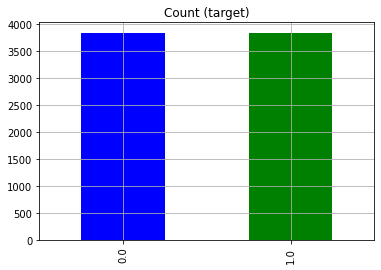

In [18]:
data = data_train.copy()
data['target'] = data_target['target']
classes_ratio = (len(data[data['target'] == 1]) / len(data[data['target'] == 0]))
if classes_ratio <= 0.6:
    print("There exists severe imablance!!")
if classes_ratio >= 0.6 and classes_ratio <= 0.95:
    print("There exists slight imbalance!!")
else:
    print("Dataset balancing looks good!!!")

data.target.value_counts().plot(kind='bar', title='Count (target)', color = ['b', 'g'], grid=True)

** As the figure shows, the number of samples in each class is equal, so the dataset was balanced.

The pca's variance ratio is [0.19620679 0.0781861 ]


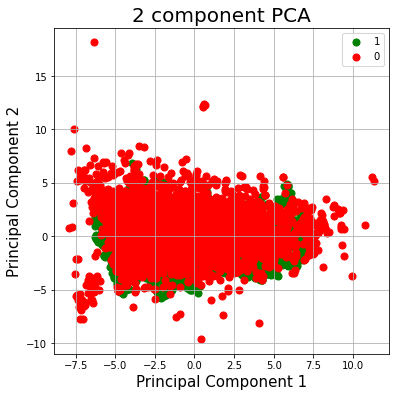

In [19]:
in_train, in_test = standardize_data(data_train, input_test_data)
principal_df, pca = project_data(in_train)
final_df = pd.concat([principal_df, data_target['target']], axis=1)
visualize_data_pca(final_df)
print(f"The pca's variance ratio is {pca.explained_variance_ratio_}")

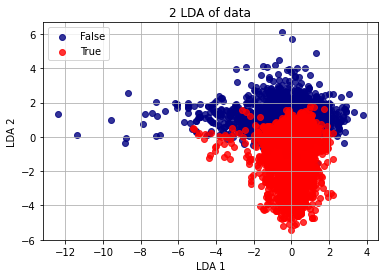



The LDA variance ratios are [0.94460384 0.05539616]



In [20]:
visualize_data_lda(data_train, data_target)

In [21]:
pca = PCA(PCA_VARIANCE)
pca.fit(in_train)
print(f"Num of principal components is {pca.n_components_}")
train_ = pca.transform(in_train)
test_ = pca.transform(in_test)

Num of principal components is 44


In [22]:
train_1, test_1, train_lbl, test_lbl = train_test_split(train_, data_target.target, test_size=1/7.0, random_state=0)
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_1, train_lbl)
print("The prediction score on test: " + str(logisticRegr.score(test_1, test_lbl)))
print("The prediction score on train: "+ str(logisticRegr.score(train_1, train_lbl)))

The prediction score on test: 0.9535095715587967
The prediction score on train: 0.9528946968545814
/home/salar/Documents/Projects/Advanced-Deep-Learning/adl/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from keras import layers, models, optimizers, losses, metrics, regularizers, initializers, callbacks


NUM_VALIDATION: int = int(len(train_) * 0.2)

bias_initializer = initializers.HeNormal()

train_1, test_1, train_lbl, test_lbl = train_test_split(train_, data_target.target, test_size=1/5.0, random_state=0)
x_validation = train_1[:NUM_VALIDATION]
x_partial_train = train_1[NUM_VALIDATION:]
y_validation = train_lbl[:NUM_VALIDATION]
y_partial_train = train_lbl[NUM_VALIDATION:]


metrics_ = [
    metrics.FalseNegatives(name="fn"),
    metrics.FalsePositives(name="fp"),
    metrics.TrueNegatives(name="tn"),
    metrics.TruePositives(name="tp"),
    metrics.Precision(name="precision"),
    metrics.Recall(name="recall"),
    metrics.AUC(name='auc'),
    metrics.AUC(name='prc', curve='PR')
]


early_stopping = callbacks.EarlyStopping(monitor='val_prc', 
                                        verbose=1,
                                        patience=10,
                                        mode='max',
                                        restore_best_weights=True)
                                      

def dl_model() -> models.Model:
    model = models.Sequential()
    model.add(layers.Dense(128, activation="relu", input_shape=(train_1.shape[-1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid', bias_initializer=bias_initializer))
    model.compile(optimizer=optimizers.Adam(lr=1e-4),
                    loss='binary_crossentropy',
                    metrics=metrics_)
    return model


def regularized_dl_model() -> models.Model:
    model = models.Sequential()
    model.add(layers.Dense(128, activation="relu", input_shape=(train_1.shape[-1],)))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.003), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.003), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(lr=1e-4),
                    loss='binary_crossentropy',
                    metrics=metrics_)
    return model

In [24]:
model = dl_model()
modle_dl_history = model.fit(x_partial_train, y_partial_train,
        epochs=1000,
        batch_size=128,
        verbose=2,
        validation_data=(x_validation, y_validation),
        shuffle=True)

print("\n")
model.summary()
print("\n")
print(f"score on test:  {str(model.evaluate(test_1, test_lbl)[1])}\n")
print(f"score on train: {str(model.evaluate(train_1, train_lbl)[1])}\n")

fp: 26.0000 - val_tn: 787.0000 - val_tp: 699.0000 - val_precision: 0.9641 - val_recall: 0.9681 - val_auc: 0.9775 - val_prc: 0.9685
Epoch 948/1000
36/36 - 0s - loss: 2.1480e-09 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 2278.0000 - tp: 2329.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.3955 - val_fn: 23.0000 - val_fp: 26.0000 - val_tn: 787.0000 - val_tp: 699.0000 - val_precision: 0.9641 - val_recall: 0.9681 - val_auc: 0.9775 - val_prc: 0.9685
Epoch 949/1000
36/36 - 0s - loss: 2.1415e-09 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 2278.0000 - tp: 2329.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.3957 - val_fn: 23.0000 - val_fp: 26.0000 - val_tn: 787.0000 - val_tp: 699.0000 - val_precision: 0.9641 - val_recall: 0.9681 - val_auc: 0.9775 - val_prc: 0.9685
Epoch 950/1000
36/36 - 0s - loss: 2.1226e-09 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 2278.0000 - tp: 2329.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 

In [25]:
model_regularized = regularized_dl_model()
model_regularized_history = model_regularized.fit(x_partial_train, y_partial_train,
        epochs=1000,
        batch_size=128,
        verbose=2,
        validation_data=(x_validation, y_validation),
        shuffle=True)

print("\n")
model_regularized.summary()
print("\n")
print(f"score on test:  {str(model_regularized.evaluate(test_1, test_lbl)[1])}\n")
print(f"score on train:  {str(model_regularized.evaluate(train_1, train_lbl)[1])}\n")

700.0000 - val_precision: 0.9722 - val_recall: 0.9695 - val_auc: 0.9884 - val_prc: 0.9889
Epoch 948/1000
36/36 - 0s - loss: 0.0066 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 2278.0000 - tp: 2329.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1279 - val_fn: 22.0000 - val_fp: 21.0000 - val_tn: 792.0000 - val_tp: 700.0000 - val_precision: 0.9709 - val_recall: 0.9695 - val_auc: 0.9891 - val_prc: 0.9893
Epoch 949/1000
36/36 - 0s - loss: 0.0066 - fn: 0.0000e+00 - fp: 1.0000 - tn: 2277.0000 - tp: 2329.0000 - precision: 0.9996 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1295 - val_fn: 21.0000 - val_fp: 22.0000 - val_tn: 791.0000 - val_tp: 701.0000 - val_precision: 0.9696 - val_recall: 0.9709 - val_auc: 0.9890 - val_prc: 0.9882
Epoch 950/1000
36/36 - 0s - loss: 0.0071 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 2278.0000 - tp: 2329.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000 - val_loss: 0.1365 - val_fn: 19.0000 - val_fp: 29.

* The metrics' value for both of the train set and test set are perfect, so, the problem of imbalance dataset has been solved. Hence, we can use these models for classification.

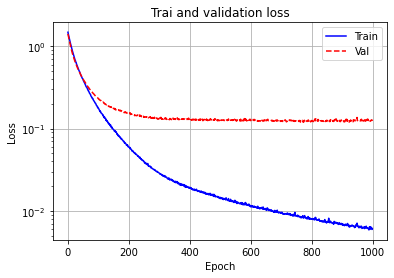

In [26]:
def plot_loss(history: callbacks.History) -> plt.plot:
  plt.semilogy(history.epoch, history.history['loss'],
               color='b', label='Train')
  plt.semilogy(history.epoch, history.history['val_loss'],
               color='r', label='Val',
               linestyle="--")
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid()
  plt.title("Trai and validation loss")
  plt.ylabel('Loss')

plot_loss(model_regularized_history)

* Decreasing values of loss for both datasets clarify that the model has been learned properly.

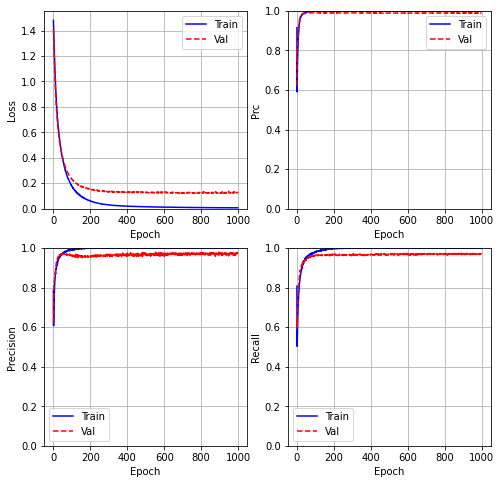

In [27]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  colors = ['b', 'g', 'r', 'y']
  plt.figure(figsize=(8, 8))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color='b', label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color='r', linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])
    plt.grid()
    plt.legend()

plot_metrics(model_regularized_history)

* The metrics' variation according to epochs are depicted, and their convergences illustrate the model's performance is well

Legitimate Transactions Detected (True Negatives):  3075
Legitimate Transactions Incorrectly Detected (False Positives):  16
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  3029
Total Fraudulent Transactions:  3051


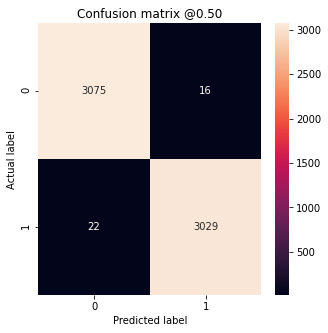

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))


predictions = model_regularized.predict(train_1)
plot_cm(train_lbl, predictions)

* If the model had predicted everything perfectly, the confusion matrix would be a diagonal matrix where values off the main diagonal, indicating incorrect predictions, would be zero. Due to the heatmap of confusion matrix, the model has been learned correctly, and its performance is so good.

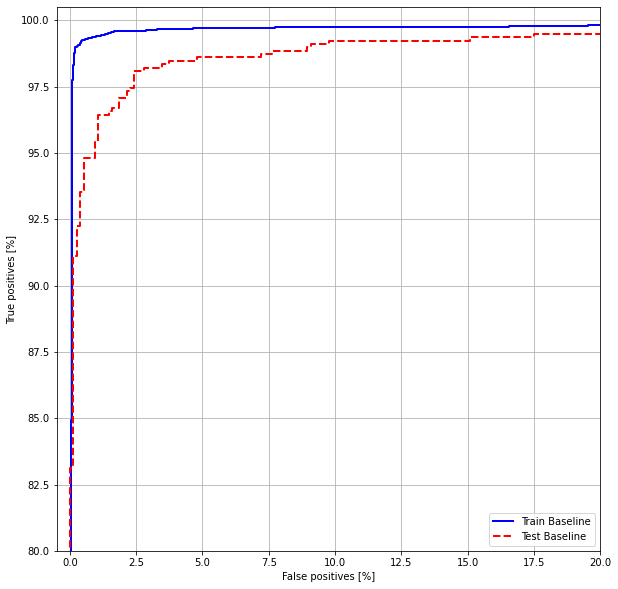

In [29]:
from sklearn.metrics import roc_curve


def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)
  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

train_predictions_baseline = model_regularized.predict(train_1)
test_predictions_baseline = model_regularized.predict(test_1)
plt.figure(figsize=(10,10))
plot_roc("Train Baseline", train_lbl, train_predictions_baseline, color='b')
plot_roc("Test Baseline", test_lbl, test_predictions_baseline, color='r', linestyle='--')
plt.legend(loc='lower right')

### ROC

* The ROC plot, which is depicted above,i s useful because it shows, at a glance, the range of performance the model can reach just by tuning the output threshold.


### AUPRC

* Now plot the AUPRC. Area under the interpolated precision-recall curve, obtained by plotting (recall, precision) points for different values of the classification threshold. Depending on how it's calculated, PR AUC may be equivalent to the average precision of the model.

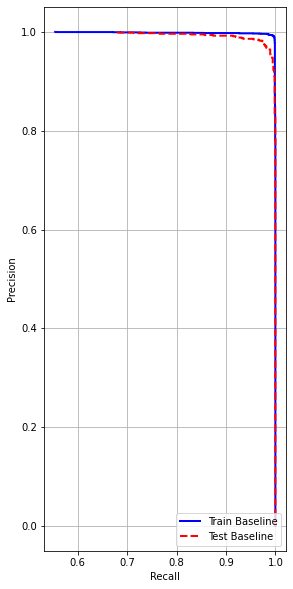

In [30]:
from sklearn.metrics import precision_recall_curve

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

train_predictions_baseline = model_regularized.predict(train_1)
test_predictions_baseline = model_regularized.predict(test_1)
plt.figure(figsize=(10,10))
plot_prc("Train Baseline", train_lbl, train_predictions_baseline, color='b')
plot_prc("Test Baseline", test_lbl, test_predictions_baseline, color='r', linestyle='--')
plt.legend(loc='lower right')

In [33]:
# predictions = model.predict_classes(test_)
predictions = model_regularized.predict_classes(test_)
test_y = pd.DataFrame(predictions, columns=['target'])
test_y['Unnamed: 0'] = out_train_data['Unnamed: 0']
test_y = test_y[['Unnamed: 0', 'target']]
test_y.to_csv('test_y.csv')
test_y.head(10) 

/home/salar/Documents/Projects/Advanced-Deep-Learning/adl/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Unnamed: 0,target
0,3915,1
1,4339,1
2,3422,1
3,5624,0
4,886,1
5,5936,1
6,3179,1
7,3969,1
8,92,1
9,3790,0
